# Machine Learning Assignment 2

Daniel Devlin | 19202103 | daniel.devlin1@ucdconnect.ie

#### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, f1_score
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

#### Load Student_ID Dataset

In [2]:
census_dataset = 'census_19202103.csv'
df_census = pd.read_csv(census_dataset)
df_census

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income-category
0,49,Private,151107,HS-grad,9,Never-married,Craft-repair,Not-in-family,Black,Male,0,0,40,United-States,<=50K
1,49,Private,248895,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,45,United-States,<=50K
2,60,Private,227266,HS-grad,9,Divorced,Sales,Not-in-family,White,Female,0,0,33,United-States,<=50K
3,62,Self-emp-not-inc,192236,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,>50K
4,23,Private,386019,9th,5,Never-married,Farming-fishing,Unmarried,White,Male,0,0,70,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,40,Private,256202,Assoc-voc,11,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
9996,34,Private,100669,Bachelors,13,Married-civ-spouse,Transport-moving,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,>50K
9997,74,Federal-gov,39890,Some-college,10,Widowed,Transport-moving,Not-in-family,White,Female,0,0,18,United-States,<=50K
9998,32,Private,193042,Prof-school,15,Married-civ-spouse,Sales,Husband,White,Male,15024,0,60,United-States,>50K


## [X] Question 1: Census Dataset ML Analysis

### [X] (a) Clean and Prepare Dataset for ML Analysis

#### Checking for Issues in the Dataframe

In [3]:
# Check for Missing Values
missing = df_census.isnull().sum(axis=1)
rows_with_missing_values = (missing > 0).sum()
print("Total of: %d rows with missing values" % (rows_with_missing_values))
print("\nTotal of: %d missing values in the dataset" % (missing.sum()))

Total of: 0 rows with missing values

Total of: 0 missing values in the dataset


No rows with missing values (as of yet lol). 

In [4]:
# Checking For Duplicates
df_census[df_census.duplicated()]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income-category
8947,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K


One duplicate row identified!

In [5]:
# Checking Column Titles for Whitespace
df_census.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' Income-category'],
      dtype='object')

All columns but age have a whitespace first before text. This can lead to errors in readability and column access. 

In [6]:
#Checking Column datatypes
df_census.dtypes

age                  int64
 workclass          object
 fnlwgt              int64
 education          object
 education-num       int64
 marital-status     object
 occupation         object
 relationship       object
 race               object
 sex                object
 capital-gain        int64
 capital-loss        int64
 hours-per-week      int64
 native-country     object
 Income-category    object
dtype: object

In [7]:
#Examining an object column's values
df_census[' occupation'].unique()

array([' Craft-repair', ' Machine-op-inspct', ' Sales', ' Prof-specialty',
       ' Farming-fishing', ' Handlers-cleaners', ' ?', ' Exec-managerial',
       ' Protective-serv', ' Adm-clerical', ' Tech-support',
       ' Other-service', ' Transport-moving', ' Priv-house-serv',
       ' Armed-Forces'], dtype=object)

Despite noticing that there is also whitespace in front of values in these rows, there is a value of '?' that obviously mean it is a missing value. 

#### Fixing First Found Issues

In [8]:
#Removing Duplicates
df_census = df_census.drop_duplicates()
len(df_census)

9999

In [9]:
#Removing Column Whitespaces
df_census.columns = df_census.columns.str.lstrip() 
df_census.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Income-category'],
      dtype='object')

#### Further Issues

#### Convert String values to Binary values in Target Column

In [10]:
df_census['Income-category'].unique()

array([' <=50K', ' >50K'], dtype=object)

The target variable of this dataset for our machine learning analysis in this assignment is the income-category column. There are two values (with a whitespace before) in this column amongst the rows, <=50K and >50K. In order to easier plot and access these values for analysis, changing them to a binary 0 or 1 value, representing if a subject's income is under or over 50K is easier than the object values of the original. 

In [11]:
#Create Binary Values in Income-Category column
col_vals = {' <=50K': 0, ' >50K': 1}
df_census['Income-category'] = df_census['Income-category'].map(col_vals)
df_census.head()

/tmp/ipykernel_11986/4232361688.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_census['Income-category'] = df_census['Income-category'].map(col_vals)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income-category
0,49,Private,151107,HS-grad,9,Never-married,Craft-repair,Not-in-family,Black,Male,0,0,40,United-States,0
1,49,Private,248895,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,45,United-States,0
2,60,Private,227266,HS-grad,9,Divorced,Sales,Not-in-family,White,Female,0,0,33,United-States,0
3,62,Self-emp-not-inc,192236,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,1
4,23,Private,386019,9th,5,Never-married,Farming-fishing,Unmarried,White,Male,0,0,70,United-States,0


In [12]:
#Remove Whitespace from object columns
df_census = df_census.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df_census

/tmp/ipykernel_11986/3218866406.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_census = df_census.applymap(lambda x: x.strip() if isinstance(x, str) else x)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income-category
0,49,Private,151107,HS-grad,9,Never-married,Craft-repair,Not-in-family,Black,Male,0,0,40,United-States,0
1,49,Private,248895,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,45,United-States,0
2,60,Private,227266,HS-grad,9,Divorced,Sales,Not-in-family,White,Female,0,0,33,United-States,0
3,62,Self-emp-not-inc,192236,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,1
4,23,Private,386019,9th,5,Never-married,Farming-fishing,Unmarried,White,Male,0,0,70,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,40,Private,256202,Assoc-voc,11,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
9996,34,Private,100669,Bachelors,13,Married-civ-spouse,Transport-moving,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,1
9997,74,Federal-gov,39890,Some-college,10,Widowed,Transport-moving,Not-in-family,White,Female,0,0,18,United-States,0
9998,32,Private,193042,Prof-school,15,Married-civ-spouse,Sales,Husband,White,Male,15024,0,60,United-States,1


In [13]:
# Replace Question Marks with NaN values
df_census = df_census.replace('?', np.nan)
df_census['occupation'].unique()

array(['Craft-repair', 'Machine-op-inspct', 'Sales', 'Prof-specialty',
       'Farming-fishing', 'Handlers-cleaners', nan, 'Exec-managerial',
       'Protective-serv', 'Adm-clerical', 'Tech-support', 'Other-service',
       'Transport-moving', 'Priv-house-serv', 'Armed-Forces'],
      dtype=object)

In [14]:
# Remove rows with Missing Values(NaN)
nan_rows = df_census.isna().any(axis=1)
nan_rows = nan_rows.sum()
print(nan_rows)

721


In [15]:
# Create dataframe with no missing values
df_census_NONAN = df_census.dropna()
df_census_NONAN

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income-category
0,49,Private,151107,HS-grad,9,Never-married,Craft-repair,Not-in-family,Black,Male,0,0,40,United-States,0
1,49,Private,248895,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,45,United-States,0
2,60,Private,227266,HS-grad,9,Divorced,Sales,Not-in-family,White,Female,0,0,33,United-States,0
3,62,Self-emp-not-inc,192236,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,1
4,23,Private,386019,9th,5,Never-married,Farming-fishing,Unmarried,White,Male,0,0,70,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,40,Private,256202,Assoc-voc,11,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
9996,34,Private,100669,Bachelors,13,Married-civ-spouse,Transport-moving,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,1
9997,74,Federal-gov,39890,Some-college,10,Widowed,Transport-moving,Not-in-family,White,Female,0,0,18,United-States,0
9998,32,Private,193042,Prof-school,15,Married-civ-spouse,Sales,Husband,White,Male,15024,0,60,United-States,1


In [16]:
#Save Dataframes to CSV's for ease
output_folder = './Dataframes/'
df_census.to_csv(output_folder + 'df_census.csv', index=False)
df_census_NONAN.to_csv(output_folder + 'df_census_NONAN.csv', index=False)

In [17]:
# Normalize numerical columns: (age, fnlwgt, hours-per-week, capital-gain, capital-loss) using MinMaxScaler
scaler = MinMaxScaler()
df_census_NONAN[['age', 'fnlwgt', 'hours-per-week', 'capital-gain', 'capital-loss']] = scaler.fit_transform(df_census_NONAN[['age', 'fnlwgt', 'hours-per-week', 'capital-gain', 'capital-loss']])

/tmp/ipykernel_11986/1408121764.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_census_NONAN[['age', 'fnlwgt', 'hours-per-week', 'capital-gain', 'capital-loss']] = scaler.fit_transform(df_census_NONAN[['age', 'fnlwgt', 'hours-per-week', 'capital-gain', 'capital-loss']])


In [18]:
df_census_NONAN

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income-category
0,0.438356,Private,0.112428,HS-grad,9,Never-married,Craft-repair,Not-in-family,Black,Male,0.000000,0.0,0.397959,United-States,0
1,0.438356,Private,0.193130,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.000000,0.0,0.448980,United-States,0
2,0.589041,Private,0.175280,HS-grad,9,Divorced,Sales,Not-in-family,White,Female,0.000000,0.0,0.326531,United-States,0
3,0.616438,Self-emp-not-inc,0.146371,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0.000000,0.0,0.397959,United-States,1
4,0.082192,Private,0.306296,9th,5,Never-married,Farming-fishing,Unmarried,White,Male,0.000000,0.0,0.704082,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.315068,Private,0.199161,Assoc-voc,11,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States,0
9996,0.232877,Private,0.070802,Bachelors,13,Married-civ-spouse,Transport-moving,Husband,Asian-Pac-Islander,Male,0.000000,0.0,0.397959,United-States,1
9997,0.780822,Federal-gov,0.020642,Some-college,10,Widowed,Transport-moving,Not-in-family,White,Female,0.000000,0.0,0.173469,United-States,0
9998,0.205479,Private,0.147036,Prof-school,15,Married-civ-spouse,Sales,Husband,White,Male,0.150242,0.0,0.602041,United-States,1


In [19]:
# Drop education column as education-num is same thing
df_census_NONAN = df_census_NONAN.drop('education', axis=1)

#### Applying One-Hot Encoding to Categorical Columns

In [20]:
df_encoded = pd.get_dummies(df_census_NONAN, columns=['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'])
output_folder = './Dataframes/'
df_encoded.to_csv(output_folder + 'df_encoded.csv', index=False)
df_encoded

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,Income-category,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.438356,0.112428,9,0.000000,0.0,0.397959,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,0.438356,0.193130,9,0.000000,0.0,0.448980,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2,0.589041,0.175280,9,0.000000,0.0,0.326531,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
3,0.616438,0.146371,13,0.000000,0.0,0.397959,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,0.082192,0.306296,5,0.000000,0.0,0.704082,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.315068,0.199161,11,0.000000,0.0,0.397959,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
9996,0.232877,0.070802,13,0.000000,0.0,0.397959,1,False,False,True,...,False,False,False,False,False,False,False,True,False,False
9997,0.780822,0.020642,10,0.000000,0.0,0.173469,0,True,False,False,...,False,False,False,False,False,False,False,True,False,False
9998,0.205479,0.147036,15,0.150242,0.0,0.602041,1,False,False,True,...,False,False,False,False,False,False,False,True,False,False


#### Identify & Replace Outliers with Lower/Upper Bound values using IQR

In [21]:
# Identify Outliers in fnlwgt & hours-per-week
Q1 = df_encoded['fnlwgt'].quantile(0.25)
Q3 = df_encoded['fnlwgt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
#Replace
df_encoded['fnlwgt'] = df_encoded['fnlwgt'].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))
fnlwgt_outliers = df_encoded[(df_encoded['fnlwgt'] < lower_bound) | (df_encoded['fnlwgt'] > upper_bound)]
len(fnlwgt_outliers)

0

In [22]:
Q1 = df_encoded['hours-per-week'].quantile(0.25)
Q3 = df_encoded['hours-per-week'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
#Replace
df_encoded['hours-per-week'] = df_encoded['hours-per-week'].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))
hours_outliers = df_encoded[(df_encoded['hours-per-week'] < lower_bound) | (df_encoded['hours-per-week'] > upper_bound)]
len(hours_outliers)

0

In [23]:
df_encoded

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,Income-category,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.438356,0.112428,9,0.000000,0.0,0.397959,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,0.438356,0.193130,9,0.000000,0.0,0.448980,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2,0.589041,0.175280,9,0.000000,0.0,0.326531,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
3,0.616438,0.146371,13,0.000000,0.0,0.397959,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,0.082192,0.306296,5,0.000000,0.0,0.525510,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.315068,0.199161,11,0.000000,0.0,0.397959,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
9996,0.232877,0.070802,13,0.000000,0.0,0.397959,1,False,False,True,...,False,False,False,False,False,False,False,True,False,False
9997,0.780822,0.020642,10,0.000000,0.0,0.321429,0,True,False,False,...,False,False,False,False,False,False,False,True,False,False
9998,0.205479,0.147036,15,0.150242,0.0,0.525510,1,False,False,True,...,False,False,False,False,False,False,False,True,False,False


In [24]:
df_census = df_encoded.copy()
output_folder = './Dataframes/'
df_census.to_csv(output_folder + 'df_census.csv', index=False)
df_census

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,Income-category,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.438356,0.112428,9,0.000000,0.0,0.397959,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,0.438356,0.193130,9,0.000000,0.0,0.448980,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2,0.589041,0.175280,9,0.000000,0.0,0.326531,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
3,0.616438,0.146371,13,0.000000,0.0,0.397959,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,0.082192,0.306296,5,0.000000,0.0,0.525510,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.315068,0.199161,11,0.000000,0.0,0.397959,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
9996,0.232877,0.070802,13,0.000000,0.0,0.397959,1,False,False,True,...,False,False,False,False,False,False,False,True,False,False
9997,0.780822,0.020642,10,0.000000,0.0,0.321429,0,True,False,False,...,False,False,False,False,False,False,False,True,False,False
9998,0.205479,0.147036,15,0.150242,0.0,0.525510,1,False,False,True,...,False,False,False,False,False,False,False,True,False,False


#### (a) Discussion: Why did I use these evaluation measures and what was cleaned in the dataframe? 


After code and visual analysis of the pandas dataframe, I identified the following issues/potential issues with the census dataframe loaded in: one duplicate row, values of '?' in some object columns identifying missing values, whitespaces in front of some column values and row values, potential confusing values in the target column(Income-category), categorical columns that could be one-hot encoded for easier analysis, outliers present in fnlwgt & hours-per-week columns, and numerical values that could be normalized in the age, fnlwgt, hours-per-week, capital-gain, capital-loss columns.

These issues/improvements that were identified were implemented over the above cells. Outliers were identified using the IQR method and replaced with lower/upper bounds respectively. Categorical columns had one-hot encoding applied to them. Multiple columns had their numerical values normalized for easier understanding. Other minor issues such as missing values and column whitespace were also fixed. We now have a final df_census dataframe that has rows containing missing values removed (appox: 721) and the above changes implemented. We now have a pre-processed clean dataframe ready for classification analysis!

### [X] (b) Evaluate Performance of 3 Basic Classifiers

In [42]:
#Load previous dataframes
df_census = pd.read_csv('./Dataframes/df_census.csv')
df_census

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,Income-category,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.438356,0.112428,9,0.000000,0.0,0.397959,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,0.438356,0.193130,9,0.000000,0.0,0.448980,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2,0.589041,0.175280,9,0.000000,0.0,0.326531,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
3,0.616438,0.146371,13,0.000000,0.0,0.397959,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,0.082192,0.306296,5,0.000000,0.0,0.525510,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9273,0.315068,0.199161,11,0.000000,0.0,0.397959,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
9274,0.232877,0.070802,13,0.000000,0.0,0.397959,1,False,False,True,...,False,False,False,False,False,False,False,True,False,False
9275,0.780822,0.020642,10,0.000000,0.0,0.321429,0,True,False,False,...,False,False,False,False,False,False,False,True,False,False
9276,0.205479,0.147036,15,0.150242,0.0,0.525510,1,False,False,True,...,False,False,False,False,False,False,False,True,False,False


#### Splitting into Test and Train Sets

In [43]:
X = df_census.drop(columns = ['Income-category']) #Setting x as the dataframe without our target feature column
y = df_census['Income-category'] #Setting y to our target feature column
y = pd.DataFrame(y) #Creating a dataframe from that Pandas series
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1) #Splitting into training and test sets

In [44]:
#Using StandardScaler to Scale training and test sets
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Decision Tree with Depth at Most 3

In [45]:
dtc_1 = DecisionTreeClassifier(criterion='entropy', max_depth=3) #Creating a Decision Tree Classifier as dtc_1 with entropy and a max_depth of 3
dtc_1.fit(X_train, y_train) #Feeding our Training sets to dtc_1

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [46]:
#Decision Tree Training Set
dtc_y_predicted_train = dtc_1.predict(X_train) #Calculating a prediction of the training set
dtc_train_f1 = f1_score(y_train, dtc_y_predicted_train) #Finding F Score

In [47]:
#Decision Tree Test Set
dtc_y_predicted_test = dtc_1.predict(X_test)
dtc_test_f1 = f1_score(y_test, dtc_y_predicted_test) 

#### Neural Network with at Most 10 Hidden Nodes

In [48]:
#MLP Classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, ), max_iter=1000, alpha=1e-4, solver='sgd', 
                     random_state=1, learning_rate_init=.1)
mlp_classifier.fit(X_train, y_train)
#Prediction on Test
y_pred = mlp_classifier.predict(X_test)
#F1 Scoring the NN
NN_f1 = f1_score(y_test, y_pred)

/home/g2square/.local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### 1-NN

In [49]:
#KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=1)
knn_classifier.fit(X_train, y_train)
#Prediction on Test
y_pred_test = knn_classifier.predict(X_test)
#F1 Scoring the KNN
KNN_f1 = f1_score(y_test, y_pred_test)

/home/g2square/.local/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [50]:
print("Decision Tree Classifier Training Set F1 Score: %f" % (dtc_train_f1))
print("Decision Tree Classifier Test Set F1 Score: %f" % (dtc_test_f1))
print("Neural Network with 10 Hidden Nodes Classifier F1 Score: %f" % (NN_f1))
print("1-NN Classifier F1 Score: %f" % (KNN_f1))

Decision Tree Classifier Training Set F1 Score: 0.610570
Decision Tree Classifier Test Set F1 Score: 0.573678
Neural Network with 10 Hidden Nodes Classifier F1 Score: 0.615690
1-NN Classifier F1 Score: 0.534636


#### (b) Discussion of Classifiers

Why use F-Score over other evaluation measures?

    I decided to use an F-Score evaluation measure to score these three classifiers as it is far more precise than evaluation measures such as accuracy score for datasets with varying columns. We have a dataset here with quite a few different attribute columns that vary quite differently in meaning being normalized and one-hot encoded. 

Best Score?

    It appears that the Neural Network with 10 Hidden Nodes Classifier has the best F1 Score. 


### [X] (c) Apply Ensembles with *Bagging* Using (b) classifiers

In [51]:
#Create a new X_Scaled
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X.values), index=X.index, columns=X.columns) 

In [52]:
# Apply np.ravel to y values
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)
y = np.ravel(y)

#### Testing Ensemble Size on Bagging Classifer

In [53]:
#Decision Tree 
scorer = make_scorer(f1_score)
ensemble_size_list = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]  #Defining a list of ensemble sizes (2-20 with intervals of 2)
dtc_results_list = [] #To Store results
dtc_best_mean_f1 = 0 
dtc_best_ensemble_size = 0
for ensemble_size in ensemble_size_list: #Iterate through all ensemble sizes
    folds = 5
    v = 0
    dtc_bagging = BaggingClassifier(dtc_1, 
                                n_estimators=ensemble_size, #Setting estimator to current ensemble_size
                                max_samples=1.0, 
                                bootstrap=True, random_state=1)
    dtc_bagging_score = cross_val_score(dtc_bagging, X_scaled, y, cv=folds, scoring=scorer, verbose=v, n_jobs=-1) #Calcuating F1 Score
    mean_f1_dtc_bagging = dtc_bagging_score.mean() #Mean 
    dtc_result_dict = {'ensemble_size': ensemble_size, 'mean_f1': mean_f1_dtc_bagging} #Creating Dict of Values
    dtc_results_list.append(dtc_result_dict)
    #If this mean is greater than the previous best, replace it
    if mean_f1_dtc_bagging > dtc_best_mean_f1: 
        dtc_best_mean_f1 = mean_f1_dtc_bagging
        dtc_best_ensemble_size = ensemble_size
    print(ensemble_size)
print("Best Mean F1 for Decision Tree: {}".format(dtc_best_mean_f1))
print("Best Ensemble Size for Decision Tree: {}".format(dtc_best_ensemble_size))
print("\nResults List:")
for result in dtc_results_list:
    print(result)

2
4
6
8
10
12
14
16
18
20
Best Mean F1 for Decision Tree: 0.6022572581937312
Best Ensemble Size for Decision Tree: 18

Results List:
{'ensemble_size': 2, 'mean_f1': 0.6019105932209332}
{'ensemble_size': 4, 'mean_f1': 0.602080535947935}
{'ensemble_size': 6, 'mean_f1': 0.6018783883084746}
{'ensemble_size': 8, 'mean_f1': 0.6018783883084746}
{'ensemble_size': 10, 'mean_f1': 0.6018783883084746}
{'ensemble_size': 12, 'mean_f1': 0.6018783883084746}
{'ensemble_size': 14, 'mean_f1': 0.6018783883084746}
{'ensemble_size': 16, 'mean_f1': 0.6018783883084746}
{'ensemble_size': 18, 'mean_f1': 0.6022572581937312}
{'ensemble_size': 20, 'mean_f1': 0.6022572581937312}


In [54]:
# Neural Network
NN_best_mean_f1 = 0
NN_best_ensemble_size = 0
NN_BAG_results_list = []
for ensemble_size in ensemble_size_list:
    folds = 5
    v = 0
    NN_bag = BaggingClassifier(mlp_classifier, 
                               n_estimators=ensemble_size,
                               max_samples=1.0, 
                               bootstrap=True, random_state=1)
    scores_NN_bag = cross_val_score(NN_bag, X_scaled, y, scoring=scorer, cv=folds, verbose=v, n_jobs=-1)
    mean_f1_NN_bag = scores_NN_bag.mean()
    NN_result_dict = {'ensemble_size': ensemble_size, 'mean_f1': mean_f1_NN_bag}
    NN_BAG_results_list.append(NN_result_dict)
    if mean_f1_NN_bag > NN_best_mean_f1:
        NN_best_mean_f1 = mean_f1_NN_bag
        best_ensemble_size_nn = ensemble_size
    print(ensemble_size)
print("Best Mean F1 for Neural Network: {}".format(NN_best_mean_f1))
print("Best Ensemble Size for Neural Network: {}".format(best_ensemble_size_nn))
print("\nResults List:")
for result in NN_BAG_results_list:
    print(result)

2
4
6
8
10
12
14
16
18
20
Best Mean F1 for Neural Network: 0.6476970019928671
Best Ensemble Size for Neural Network: 12

Results List:
{'ensemble_size': 2, 'mean_f1': 0.6213699355748517}
{'ensemble_size': 4, 'mean_f1': 0.6406369199942329}
{'ensemble_size': 6, 'mean_f1': 0.6407806115569932}
{'ensemble_size': 8, 'mean_f1': 0.6460080798092451}
{'ensemble_size': 10, 'mean_f1': 0.6423564728726555}
{'ensemble_size': 12, 'mean_f1': 0.6476970019928671}
{'ensemble_size': 14, 'mean_f1': 0.6421006686266756}
{'ensemble_size': 16, 'mean_f1': 0.6403584001991108}
{'ensemble_size': 18, 'mean_f1': 0.6390085889053696}
{'ensemble_size': 20, 'mean_f1': 0.6407432778643246}


In [55]:
# KNN
KNN_best_mean_f1 = 0
KNN_best_ensemble_size = 0
KNN_results_list = []
for ensemble_size in ensemble_size_list:
    folds = 5
    v = 0
    kNN_bag = BaggingClassifier(knn_classifier, 
                                n_estimators=ensemble_size,
                                max_samples=1.0, 
                                bootstrap=True, random_state=1)
    scores_kNN_bag = cross_val_score(kNN_bag, X_scaled, y, scoring=scorer, cv=folds, verbose=v, n_jobs=-1)
    mean_f1_kNN_bag = scores_kNN_bag.mean()
    KNN_result_dict = {'ensemble_size': ensemble_size, 'mean_f1': mean_f1_kNN_bag}
    KNN_results_list.append(KNN_result_dict)
    if mean_f1_kNN_bag > KNN_best_mean_f1:
        KNN_best_mean_f1 = mean_f1_kNN_bag
        KNN_best_ensemble_size = ensemble_size
print("Best Mean F1 for KNN: {}".format(KNN_best_mean_f1))
print("Best Ensemble Size for KNN: {}".format(KNN_best_ensemble_size))
print("\nResults List:")
for result in KNN_results_list:
    print(result)

Best Mean F1 for KNN: 0.5597852394763354
Best Ensemble Size for KNN: 12

Results List:
{'ensemble_size': 2, 'mean_f1': 0.5039885311757728}
{'ensemble_size': 4, 'mean_f1': 0.5371755034466599}
{'ensemble_size': 6, 'mean_f1': 0.5493315624138293}
{'ensemble_size': 8, 'mean_f1': 0.5549687303134359}
{'ensemble_size': 10, 'mean_f1': 0.5588473734019754}
{'ensemble_size': 12, 'mean_f1': 0.5597852394763354}
{'ensemble_size': 14, 'mean_f1': 0.5576665823305602}
{'ensemble_size': 16, 'mean_f1': 0.5580783325290389}
{'ensemble_size': 18, 'mean_f1': 0.559179636098357}
{'ensemble_size': 20, 'mean_f1': 0.5596883913807742}


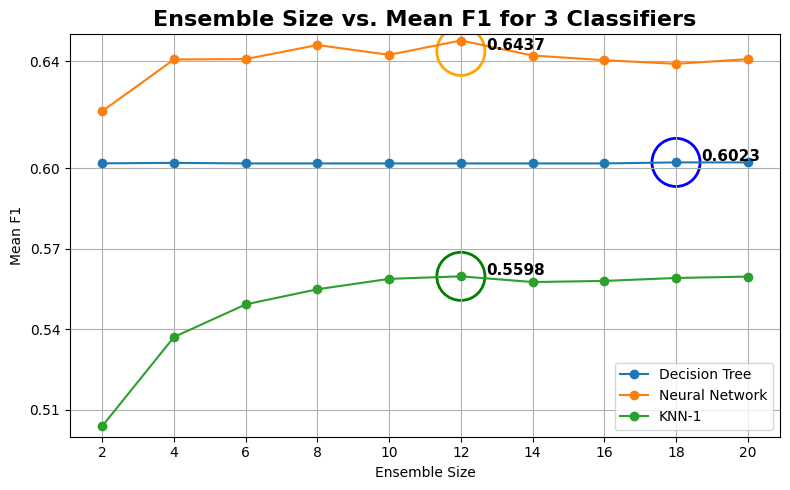

In [73]:
#Plot Bagging Classifiers Ensemble Sizes Accuracy Scores

#Collect data from above outputs
dtc_ensemble_sizes = [result['ensemble_size'] for result in dtc_results_list]
dtc_mean_f1_bag = [result['mean_f1'] for result in dtc_results_list]
nn_ensemble_sizes = [result['ensemble_size'] for result in NN_BAG_results_list]
nn_mean_f1_bag = [result['mean_f1'] for result in NN_BAG_results_list]
knn_ensemble_sizes = [result['ensemble_size'] for result in KNN_results_list]
knn_mean_f1_bag = [result['mean_f1'] for result in KNN_results_list]
#Create Subplots
fig, ax = plt.subplots(figsize=(8, 5))
#Plot data
ax.plot(dtc_ensemble_sizes, dtc_mean_f1_bag, label='Decision Tree', marker='o')
ax.plot(nn_ensemble_sizes, nn_mean_f1_bag, label='Neural Network', marker='o')
ax.plot(knn_ensemble_sizes, knn_mean_f1_bag, label='KNN-1', marker='o')
ax.set_title('Ensemble Size vs. Mean F1 for 3 Classifiers', fontweight='bold', fontsize=16)
#X
ax.set_xlabel('Ensemble Size')
ax.set_xticks(ensemble_size_list)
#Y
ax.set_ylabel('Mean F1')
yticks = [0.51, 0.54, 0.57, 0.60, 0.64]
ax.set_yticks(yticks)
ax.set_yticklabels([str(tick) for tick in yticks])
ax.set_ylim(bottom=0.50, top=0.65)
ax.yaxis.set_major_formatter(ScalarFormatter()) 
#Plot Circles
dtc_best_point = (18, 0.6022572581937312)  
nn_best_point = (12, 0.6436582695010384)   
knn_best_point = (12, 0.5597852394763354)  
plt.scatter(*dtc_best_point, s=1200, facecolors='none', edgecolors='blue', linewidths=2,)
plt.scatter(*nn_best_point, s=1200, facecolors='none', edgecolors='orange', linewidths=2,)
plt.scatter(*knn_best_point, s=1200, facecolors='none', edgecolors='green', linewidths=2)
for point in [dtc_best_point, nn_best_point, knn_best_point]:
    plt.text(point[0] + 0.7, point[1] + 0.0022, f'{point[1]:.4f}', fontsize=11, color='black', ha='left', va='center', fontweight='bold')
#More Specs
ax.legend(loc='lower right')
ax.grid(True)
plt.tight_layout()
plt.show()

#### Now Find Best Number of Instances in the bootstrap Samples by Iterating through max_samples

In [57]:
# Finding Best number of Instances in the bootstrap samples
max_samples_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
dtc_best_max_samples = 0
dtc_best_mean_f1_sample = 0
dtc_bag_samples_results_list = []

for max_sample_n in max_samples_list:
    folds = 5
    v = 0
    dtc_bagging = BaggingClassifier(dtc_1, 
                                n_estimators=dtc_best_ensemble_size, 
                                max_samples=max_sample_n, 
                                bootstrap=True, random_state=1)
    dtc_bagging_score = cross_val_score(dtc_bagging, X_scaled, y, cv=folds, scoring=scorer, verbose=v, n_jobs=-1) #Calcuating F1 Score
    mean_f1_dtc_bag = dtc_bagging_score.mean()
    dtc_samples_result_dict = {'max_samples': max_sample_n, 'mean_f1': mean_f1_dtc_bag}
    dtc_bag_samples_results_list.append(dtc_samples_result_dict)
    if mean_f1_dtc_bag > dtc_best_mean_f1_sample:
        dtc_best_mean_f1_sample = mean_f1_dtc_bag
        dtc_best_max_samples = max_sample_n
    print(max_sample_n)
# Print the results for Decision Tree
print("Best Mean F1 for Decision Tree: {}".format(dtc_best_mean_f1_sample))
print("Best Max Samples for Decision Tree: {}".format(dtc_best_max_samples))
print("\nResults List:")
for result in dtc_bag_samples_results_list:
    print(result)

0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9
1.0
Best Mean F1 for Decision Tree: 0.6050430439925206
Best Max Samples for Decision Tree: 0.1

Results List:
{'max_samples': 0.1, 'mean_f1': 0.6050430439925206}
{'max_samples': 0.2, 'mean_f1': 0.602080535947935}
{'max_samples': 0.3, 'mean_f1': 0.602080535947935}
{'max_samples': 0.4, 'mean_f1': 0.602080535947935}
{'max_samples': 0.5, 'mean_f1': 0.602080535947935}
{'max_samples': 0.6, 'mean_f1': 0.6018783883084746}
{'max_samples': 0.7, 'mean_f1': 0.6018783883084746}
{'max_samples': 0.8, 'mean_f1': 0.6018783883084746}
{'max_samples': 0.9, 'mean_f1': 0.6018783883084746}
{'max_samples': 1.0, 'mean_f1': 0.6022572581937312}


In [58]:
# Finding Best number of Instances in the bootstrap samples
NN_bag_samples_results_list = []
NN_best_mean_f1_sample = 0
for max_sample_n in max_samples_list:
    folds = 5
    v = 0
    NN_bag = BaggingClassifier(mlp_classifier, 
                               n_estimators=best_ensemble_size_nn,
                               max_samples=max_sample_n, 
                               bootstrap=True, random_state=1)
    scores_NN_bag = cross_val_score(NN_bag, X_scaled, y, cv=folds, scoring=scorer, verbose=v, n_jobs=-1)
    mean_f1_NN_bag = scores_NN_bag.mean()
    NN_samples_result_dict = {'max_samples': max_sample_n, 'mean_f1': mean_f1_NN_bag}
    NN_bag_samples_results_list.append(NN_samples_result_dict)
    if mean_f1_NN_bag > NN_best_mean_f1_sample:
        NN_best_mean_f1_sample = mean_f1_NN_bag
        best_max_samples_nn = max_sample_n
    print(max_sample_n)
print("Best Mean F1 for Neural Network: {}".format(NN_best_mean_f1_sample))
print("Best Max Samples for Neural Network: {}".format(best_max_samples_nn))
print("\nResults List:")
for result in NN_bag_samples_results_list:
    print(result)

0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9
1.0
Best Mean F1 for Neural Network: 0.6567978753797518
Best Max Samples for Neural Network: 0.1

Results List:
{'max_samples': 0.1, 'mean_f1': 0.6567978753797518}
{'max_samples': 0.2, 'mean_f1': 0.649431893122832}
{'max_samples': 0.3, 'mean_f1': 0.6464792037165534}
{'max_samples': 0.4, 'mean_f1': 0.6425169593475664}
{'max_samples': 0.5, 'mean_f1': 0.6465271255506818}
{'max_samples': 0.6, 'mean_f1': 0.6415491817538914}
{'max_samples': 0.7, 'mean_f1': 0.6426070668169805}
{'max_samples': 0.8, 'mean_f1': 0.6387328288936513}
{'max_samples': 0.9, 'mean_f1': 0.641739925402715}
{'max_samples': 1.0, 'mean_f1': 0.6476970019928671}


In [59]:
# Finding Best number of Instances in the bootstrap samples
KNN_bag_samples_results_list = []
KNN_best_mean_f1_sample = 0
for max_sample_n in max_samples_list: 
    folds = 5
    v = 0
    kNN_bag = BaggingClassifier(knn_classifier, 
                                n_estimators=KNN_best_ensemble_size,
                                max_samples=max_sample_n, 
                                bootstrap=True, random_state=1)
    scores_kNN_bag = cross_val_score(kNN_bag, X_scaled, y, cv=folds, scoring=scorer, verbose=v, n_jobs=-1)
    mean_f1_kNN_bag = scores_kNN_bag.mean()
    print(max_sample_n)
    KNN_samples_result_dict = {'max_samples': max_sample_n, 'mean_f1': mean_f1_kNN_bag}
    KNN_bag_samples_results_list.append(KNN_samples_result_dict)
    if mean_f1_kNN_bag > KNN_best_mean_f1_sample:
        KNN_best_mean_f1_sample = mean_f1_kNN_bag
        best_max_sample = max_sample_n
print("Best Mean F1 for KNN: {}".format(KNN_best_mean_f1_sample))
print("Best Max_sample for KNN: {}".format(best_max_sample))
print("\nResults List:")
for result in KNN_bag_samples_results_list:
    print(result)

0.1
0.2
0.3


0.4
0.5
0.6
0.7
0.8
0.9
1.0
Best Mean F1 for KNN: 0.5882197867766135
Best Max_sample for KNN: 0.1

Results List:
{'max_samples': 0.1, 'mean_f1': 0.5882197867766135}
{'max_samples': 0.2, 'mean_f1': 0.5870668313191288}
{'max_samples': 0.3, 'mean_f1': 0.5835179623131577}
{'max_samples': 0.4, 'mean_f1': 0.5770726670806409}
{'max_samples': 0.5, 'mean_f1': 0.5672734001501549}
{'max_samples': 0.6, 'mean_f1': 0.5675478931477257}
{'max_samples': 0.7, 'mean_f1': 0.5656181300374676}
{'max_samples': 0.8, 'mean_f1': 0.562203320622052}
{'max_samples': 0.9, 'mean_f1': 0.5586920571949483}
{'max_samples': 1.0, 'mean_f1': 0.5597852394763354}


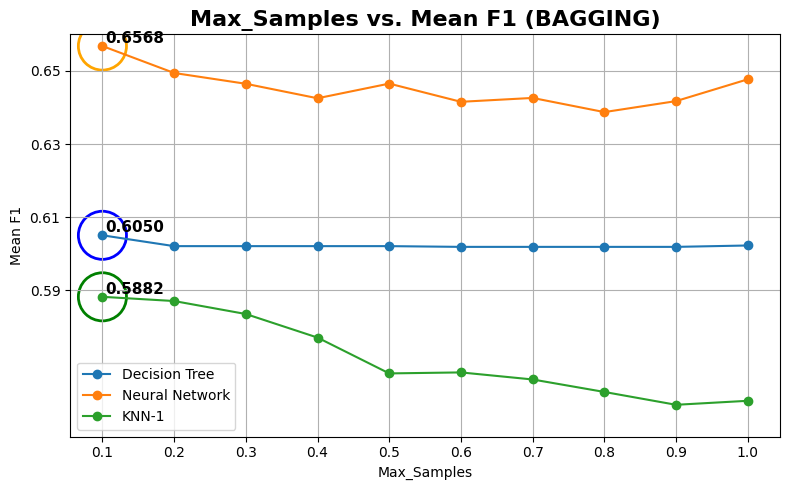

In [60]:
# Plot Bagging Best Ensemble Sizes and Max_Samples. Circle best values
fig, ax = plt.subplots(figsize=(8, 5))

dtc_max_samples = [result['max_samples'] for result in dtc_bag_samples_results_list]
dtc_mean_f1_samples = [result['mean_f1'] for result in dtc_bag_samples_results_list]
nn_max_samples = [result['max_samples'] for result in NN_bag_samples_results_list]
nn_mean_f1_samples = [result['mean_f1'] for result in NN_bag_samples_results_list]
knn_max_samples = [result['max_samples'] for result in KNN_bag_samples_results_list]
knn_mean_f1_samples = [result['mean_f1'] for result in KNN_bag_samples_results_list]
ax.plot(dtc_max_samples, dtc_mean_f1_samples, label='Decision Tree', marker='o')
ax.plot(nn_max_samples, nn_mean_f1_samples, label='Neural Network', marker='o')
ax.plot(knn_max_samples, knn_mean_f1_samples, label='KNN-1', marker='o')
ax.set_title('Max_Samples vs. Mean F1 (BAGGING)', fontweight='bold', fontsize=16)
#X
ax.set_xlabel('Max_Samples')
ax.set_xticks(max_samples_list)
#Y
ax.set_ylabel('Mean F1')
yticks = [0.59, 0.61, 0.63, 0.65]
ax.set_yticks(yticks)
ax.set_yticklabels([str(tick) for tick in yticks])
ax.set_ylim(bottom=0.55, top=0.66)
ax.yaxis.set_major_formatter(ScalarFormatter())
#Plot Circles
dtc_best_point = (0.1, 0.6050430439925206)  
nn_best_point = (0.1, 0.6567978753797518)   
knn_best_point = (0.1, 0.5882197867766135)
plt.scatter(*dtc_best_point, s=1200, facecolors='none', edgecolors='blue', linewidths=2,)
plt.scatter(*nn_best_point, s=1200, facecolors='none', edgecolors='orange', linewidths=2,)
plt.scatter(*knn_best_point, s=1200, facecolors='none', edgecolors='green', linewidths=2)
for point in [dtc_best_point, nn_best_point, knn_best_point]:
    plt.text(point[0] + 0.0038, point[1] + 0.002, f'{point[1]:.4f}', fontsize=11, color='black', ha='left', va='center', fontweight='bold')
ax.legend(loc='lower left')
ax.grid(True)
plt.tight_layout()
plt.show()

#### (c) Discussion

For Task c of Question 1, I was tasked with applying ensembles with the method of bagging to each of the classifiers from Task b. To find the best settings in which these classifiers will perform, I first changed the ensemble size of the ensemble with bagging on each classifer in iterations through (2-20) in increments of 2. The best ensemble size for each classifier by their F1 Scores: 

        Decision Tree: 18(0.6022572581937312)

        Neural Network: 12(0.6436582695010384)

        KNN-1: 12(0.5597852394763354)

After finding the best ensemble size, we can further attempt to find the best settings in which these classifiers will perform by changing the number of instances in the bootstrap samples. I will do this by iterating through (0.1-1.0) in increments of 0.1 and changing each iteration max_sample of the BaggingClassifier to that iteration's value. The best F1 Score of this should show us the Best Ensemble Size with Best Max_Sample value for the ensemble with bagging of each of the 3 classifiers. 

        Decision Tree(18): 0.1(0.6050430439925206)

        Neural Network(12): 0.1(0.6567978753797518)

        KNN-1(12): 0.1(0.5882197867766135)


So therefore, a Neural Network with an Ensemble size of 12 and Bagging Classifier Max_Samples of 0.1, would be the best classifier to use for analysis. 

### [X] (d) Apply Ensembles with *Random Subspacing* Using (b) classifiers

In [63]:
# Ensemble Size Decision Tree Random SS
dtc_SS_best_mean_f1 = 0
dtc_SS_best_ensemble_size = 0
dtc_random_results_list = []
for ensemble_size in ensemble_size_list:
    dtc_random_SS = BaggingClassifier(dtc_1, 
                                n_estimators = ensemble_size,
                                max_samples=1.0, 
                                max_features=0.5, random_state=10)
    scores_tree = cross_val_score(dtc_1, X_scaled, y, cv=folds, verbose = v, n_jobs = -1)
    scores_tree_rSS = cross_val_score(dtc_random_SS, X_scaled, y, cv=folds, scoring=scorer, verbose = v, n_jobs = -1)
    mean_f1_random_dtc = scores_tree_rSS.mean()
    dtc_result_dict = {'ensemble_size': ensemble_size, 'mean_f1': dtc_SS_best_mean_f1}
    dtc_random_results_list.append(dtc_result_dict)
    if mean_f1_random_dtc > dtc_SS_best_mean_f1:
        dtc_SS_best_mean_f1 = mean_f1_random_dtc
        dtc_SS_best_ensemble_size = ensemble_size
    print(ensemble_size)
print(dtc_SS_best_mean_f1)
print(dtc_SS_best_ensemble_size)
print("\nResults List:")
dtc_random_results_list.pop(0) #Removing the ensemble size of 2 as it outputs zero and messes up the plot
for result in dtc_random_results_list:
    print(result)

2
4
6
8
10
12
14
16
18
20
0.5963827656823135
12

Results List:
{'ensemble_size': 4, 'mean_f1': 0.5283433675540712}
{'ensemble_size': 6, 'mean_f1': 0.5283433675540712}
{'ensemble_size': 8, 'mean_f1': 0.5710149875788738}
{'ensemble_size': 10, 'mean_f1': 0.5859998480158408}
{'ensemble_size': 12, 'mean_f1': 0.5859998480158408}
{'ensemble_size': 14, 'mean_f1': 0.5963827656823135}
{'ensemble_size': 16, 'mean_f1': 0.5963827656823135}
{'ensemble_size': 18, 'mean_f1': 0.5963827656823135}
{'ensemble_size': 20, 'mean_f1': 0.5963827656823135}


In [64]:
# Ensemble Size Neural Network Random SS
NN_random_best_mean_f1 = 0
NN_random_best_ensemble_size = 0
NN_random_results_list = []

for ensemble_size in ensemble_size_list:
    random_SS_NN = BaggingClassifier(mlp_classifier, 
                            n_estimators = ensemble_size,
                            max_samples=1.0, 
                            max_features=0.5, random_state=10)
    scores_nn = cross_val_score(mlp_classifier, X_scaled, y, cv=folds, scoring=scorer, verbose = v, n_jobs = -1)
    scores_nn_rSS = cross_val_score(random_SS_NN, X_scaled, y, cv=folds, scoring=scorer, verbose = v, n_jobs = -1)
    mean_f1_random_NN = scores_nn_rSS.mean()
    NN_result_dict = {'ensemble_size': ensemble_size, 'mean_f1': mean_f1_random_NN}
    NN_random_results_list.append(NN_result_dict)
    if mean_f1_random_NN > NN_random_best_mean_f1:
        NN_random_best_mean_f1 = mean_f1_random_NN
        NN_random_best_ensemble_size = ensemble_size
    print(ensemble_size)
print(NN_random_best_mean_f1)
print(NN_random_best_ensemble_size)
print("\nResults List:")
for result in NN_random_results_list:
    print(result)

2
4
6
8
10
12
14
16
18
20
0.6408502877595704
18

Results List:
{'ensemble_size': 2, 'mean_f1': 0.5924588474534567}
{'ensemble_size': 4, 'mean_f1': 0.6098715343099821}
{'ensemble_size': 6, 'mean_f1': 0.6221650381069981}
{'ensemble_size': 8, 'mean_f1': 0.6193547353512115}
{'ensemble_size': 10, 'mean_f1': 0.6309475697934019}
{'ensemble_size': 12, 'mean_f1': 0.6342593234714415}
{'ensemble_size': 14, 'mean_f1': 0.6376057087620218}
{'ensemble_size': 16, 'mean_f1': 0.6355595535200991}
{'ensemble_size': 18, 'mean_f1': 0.6408502877595704}
{'ensemble_size': 20, 'mean_f1': 0.6381282930338849}


In [65]:
# Ensemble Size KNN Random
KNN_random_best_mean_f1 = 0
KNN_random_best_ensemble_size = 0
KNN_random_results_list = []

for ensemble_size in ensemble_size_list:
    random_SS_KNN = BaggingClassifier(knn_classifier, 
                            n_estimators = ensemble_size,
                            max_samples=1.0, 
                            max_features=0.5, random_state=1)
    scores_Knn = cross_val_score(knn_classifier, X_scaled, y, cv=folds, scoring=scorer, verbose = v, n_jobs = -1)
    scores_Knn_rSS = cross_val_score(random_SS_KNN, X_scaled, y, cv=folds, scoring=scorer, verbose = v, n_jobs = -1)
    mean_f1_random_KNN = scores_Knn_rSS.mean()
    KNN_result_dict = {'ensemble_size': ensemble_size, 'mean_f1': mean_f1_random_KNN}
    KNN_random_results_list.append(KNN_result_dict)
    if mean_f1_random_KNN > KNN_random_best_mean_f1:
        KNN_random_best_mean_f1 = mean_f1_random_KNN
        KNN_random_best_ensemble_size = ensemble_size
    print(ensemble_size)
print(KNN_random_best_mean_f1)
print(KNN_random_best_ensemble_size)
for result in KNN_random_results_list:
    print(result)

2
4
6
8
10
12
14
16
18
20
0.5973813715620981
18
{'ensemble_size': 2, 'mean_f1': 0.38257173330566985}
{'ensemble_size': 4, 'mean_f1': 0.4859005810500321}
{'ensemble_size': 6, 'mean_f1': 0.5030421007609713}
{'ensemble_size': 8, 'mean_f1': 0.5419462113464781}
{'ensemble_size': 10, 'mean_f1': 0.5596761870299021}
{'ensemble_size': 12, 'mean_f1': 0.566452736165454}
{'ensemble_size': 14, 'mean_f1': 0.5794093641765676}
{'ensemble_size': 16, 'mean_f1': 0.5876789129895302}
{'ensemble_size': 18, 'mean_f1': 0.5973813715620981}
{'ensemble_size': 20, 'mean_f1': 0.5967063476048101}


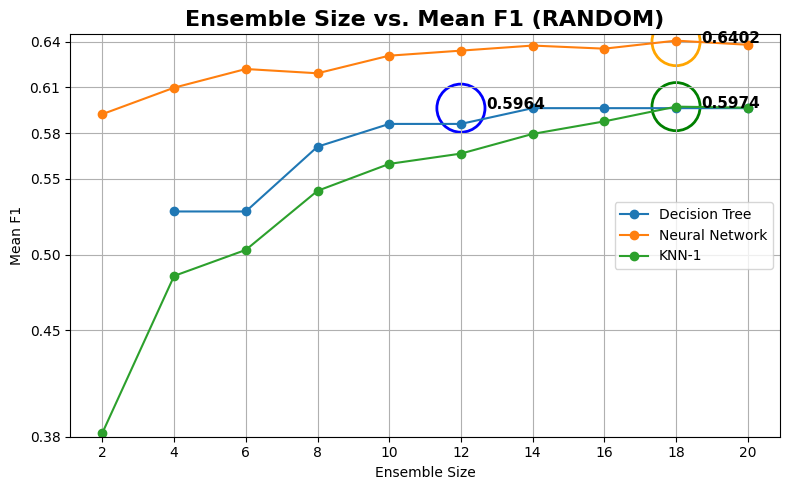

In [66]:
# Plot Random Ensemble Sizes
dtc_random_ensemble_sizes = [result['ensemble_size'] for result in dtc_random_results_list]
dtc_mean_f1_random = [result['mean_f1'] for result in dtc_random_results_list]
nn_random_ensemble_sizes = [result['ensemble_size'] for result in NN_random_results_list]
nn_mean_f1_random = [result['mean_f1'] for result in NN_random_results_list]
knn_random_ensemble_sizes = [result['ensemble_size'] for result in KNN_random_results_list]
knn_mean_f1_random = [result['mean_f1'] for result in KNN_random_results_list]
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(dtc_random_ensemble_sizes, dtc_mean_f1_random, label='Decision Tree', marker='o')
ax.plot(nn_random_ensemble_sizes, nn_mean_f1_random, label='Neural Network', marker='o')
ax.plot(knn_random_ensemble_sizes, knn_mean_f1_random, label='KNN-1', marker='o')
ax.set_xlabel('Ensemble Size')
ax.set_ylabel('Mean F1')
ax.set_title('Ensemble Size vs. Mean F1 (RANDOM)', fontweight='bold', fontsize=16)
ax.set_xticks(ensemble_size_list)
yticks = [0.38, 0.45, 0.50, 0.55, 0.58, 0.61, 0.64]
ax.set_yticks(yticks)
ax.set_yticklabels([str(tick) for tick in yticks])
ax.set_ylim(bottom=0.38, top=0.645)
dtc_best_point = (12, 0.5963827656823135)  
nn_best_point = (18, 0.6402049982786732)   
knn_best_point = (18, 0.5973813715620981)
plt.scatter(*dtc_best_point, s=1200, facecolors='none', edgecolors='blue', linewidths=2,)
plt.scatter(*nn_best_point, s=1200, facecolors='none', edgecolors='orange', linewidths=2,)
plt.scatter(*knn_best_point, s=1200, facecolors='none', edgecolors='green', linewidths=2)
for point in [dtc_best_point, nn_best_point, knn_best_point]:
    plt.text(point[0] + 0.7, point[1] + 0.0022, f'{point[1]:.4f}', fontsize=11, color='black', ha='left', va='center', fontweight='bold')
ax.yaxis.set_major_formatter(ScalarFormatter()) 
ax.legend(loc='center right')
ax.grid(True)
plt.tight_layout()
plt.show()

In [67]:
# Best Ensemble Size Max_Features DTC
max_features_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
dtc_best_max_features = 0
dtc_random_best_mean_f1 = 0
dtc_random_features_results_list = []

for max_feature_n in max_features_list:
    folds = 5
    v = 0
    random_SS_dtc = BaggingClassifier(dtc_1, 
                                n_estimators = dtc_SS_best_ensemble_size,
                                max_samples=1.0, 
                                max_features=max_feature_n, random_state=10)
    scores_tree = cross_val_score(dtc_1, X_scaled, y, cv=folds, scoring=scorer, verbose = v, n_jobs = -1)
    scores_tree_rSS = cross_val_score(random_SS_dtc, X_scaled, y, cv=folds, scoring=scorer, verbose = v, n_jobs = -1)
    mean_f1_random_dtc = scores_tree_rSS.mean()
    dtc_features_result_dict = {'max_features': max_feature_n, 'mean_f1': mean_f1_random_dtc}
    dtc_random_features_results_list.append(dtc_features_result_dict)
    if mean_f1_random_dtc > dtc_random_best_mean_f1:
        dtc_random_best_mean_f1 = mean_f1_random_dtc
        dtc_best_max_features = max_feature_n
    print(max_feature_n)
print("Best Mean F1 for Decision Tree: {}".format(dtc_random_best_mean_f1))
print("Best Max Features for Decision Tree: {}".format(dtc_best_max_features))
print("\nResults List:")
for result in dtc_random_features_results_list:
    print(result)

0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9
1.0
Best Mean F1 for Decision Tree: 0.6031037823171135
Best Max Features for Decision Tree: 0.7

Results List:
{'max_features': 0.1, 'mean_f1': 0.24136182941102366}
{'max_features': 0.2, 'mean_f1': 0.3739583640642545}
{'max_features': 0.3, 'mean_f1': 0.571269702030433}
{'max_features': 0.4, 'mean_f1': 0.5948972650010813}
{'max_features': 0.5, 'mean_f1': 0.5963827656823135}
{'max_features': 0.6, 'mean_f1': 0.6008674272128998}
{'max_features': 0.7, 'mean_f1': 0.6031037823171135}
{'max_features': 0.8, 'mean_f1': 0.602467866055723}
{'max_features': 0.9, 'mean_f1': 0.6026687586336001}
{'max_features': 1.0, 'mean_f1': 0.6026687586336001}


In [68]:
# Best Ensemble Size Max_Features Neural Network
NN_best_max_features = 0
NN_best_mean_f1_features = 0
NN_random_features_results_list = []
for max_feature_n in max_features_list:
    folds = 5
    v = 0
    random_SS_NN = BaggingClassifier(mlp_classifier, 
                            n_estimators = NN_random_best_ensemble_size,
                            max_samples=1.0, 
                            max_features=max_feature_n, random_state=10)
    scores_nn = cross_val_score(mlp_classifier, X_scaled, y, cv=folds,scoring=scorer, verbose = v, n_jobs = -1)
    scores_nn_rSS = cross_val_score(random_SS_NN, X_scaled, y, cv=folds, scoring=scorer, verbose = v, n_jobs = -1)
    mean_f1_features_NN = scores_nn_rSS.mean()
    NN_features_result_dict = {'max_features': max_feature_n, 'mean_f1': mean_f1_features_NN}
    NN_random_features_results_list.append(NN_features_result_dict)
    if mean_f1_features_NN > NN_best_mean_f1_features:
        NN_best_mean_f1_features = mean_f1_features_NN
        NN_best_max_features = max_feature_n
    print(max_feature_n)
print("Best Mean F1 for Neural Network: {}".format(NN_best_mean_f1_features))
print("Best Max Features for Neural Network: {}".format(NN_best_max_features))
print("\nResults List:")
for result in NN_random_features_results_list:
    print(result)

0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9
1.0
Best Mean F1 for Neural Network: 0.6580270973684386
Best Max Features for Neural Network: 0.7

Results List:
{'max_features': 0.1, 'mean_f1': 0.08274223459452067}
{'max_features': 0.2, 'mean_f1': 0.4769324569327146}
{'max_features': 0.3, 'mean_f1': 0.5867883109044889}
{'max_features': 0.4, 'mean_f1': 0.6198008500948058}
{'max_features': 0.5, 'mean_f1': 0.6408502877595704}
{'max_features': 0.6, 'mean_f1': 0.6445397339259016}
{'max_features': 0.7, 'mean_f1': 0.6580270973684386}
{'max_features': 0.8, 'mean_f1': 0.6461798982428398}
{'max_features': 0.9, 'mean_f1': 0.6450629702255417}
{'max_features': 1.0, 'mean_f1': 0.6386725723374731}


In [69]:
# Best Ensemble Size Max_Features KNN
KNN_best_max_features = 0
KNN_best_mean_f1_features = 0
KNN_random_feature_results_list = []
for max_feature_n in max_features_list:
    folds = 5
    v = 0
    random_SS_KNN = BaggingClassifier(knn_classifier, 
                            n_estimators = KNN_random_best_ensemble_size,
                            max_samples=1.0, 
                            max_features=max_feature_n, random_state=1)
    scores_Knn = cross_val_score(knn_classifier, X_scaled, y, cv=folds, scoring=scorer, verbose = v, n_jobs = -1)
    scores_Knn_rSS = cross_val_score(random_SS_KNN, X_scaled, y, cv=folds, scoring=scorer, verbose = v, n_jobs = -1)
    mean_f1_features_KNN = scores_Knn_rSS.mean()
    KNN_features_result_dict = {'max_features': max_feature_n, 'mean_f1': mean_f1_features_KNN}
    KNN_random_feature_results_list.append(KNN_features_result_dict)
    if mean_f1_features_KNN > KNN_best_mean_f1_features:
        KNN_best_mean_f1_features = mean_f1_features_KNN
        KNN_best_max_features = max_feature_n
    print(max_feature_n)
print("Best Mean F1 for KNN: {}".format(KNN_best_mean_f1_features))
print("Best Max Features for KNN: {}".format(KNN_best_max_features))
print("\nResults List:")
for result in KNN_random_feature_results_list:
    print(result)

0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9
1.0
Best Mean F1 for KNN: 0.5973813715620981
Best Max Features for KNN: 0.5

Results List:
{'max_features': 0.1, 'mean_f1': 0.10175668800170654}
{'max_features': 0.2, 'mean_f1': 0.4380491859322383}
{'max_features': 0.3, 'mean_f1': 0.5006227857325707}
{'max_features': 0.4, 'mean_f1': 0.5707365248309764}
{'max_features': 0.5, 'mean_f1': 0.5973813715620981}
{'max_features': 0.6, 'mean_f1': 0.5967079948395202}
{'max_features': 0.7, 'mean_f1': 0.5878215365599058}
{'max_features': 0.8, 'mean_f1': 0.584411116489785}
{'max_features': 0.9, 'mean_f1': 0.5701298391032175}
{'max_features': 1.0, 'mean_f1': 0.559179636098357}


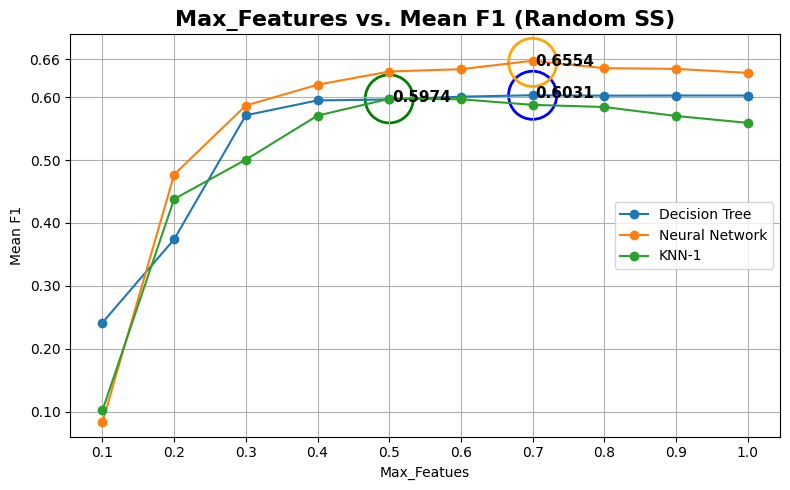

In [70]:
# Plot
fig, ax = plt.subplots(figsize=(8, 5))

dtc_max_features = [result['max_features'] for result in dtc_random_features_results_list]
dtc_mean_f1_features = [result['mean_f1'] for result in dtc_random_features_results_list]
nn_max_features = [result['max_features'] for result in NN_random_features_results_list]
nn_mean_f1_features = [result['mean_f1'] for result in NN_random_features_results_list]
knn_max_features = [result['max_features'] for result in KNN_random_feature_results_list]
knn_mean_f1_features = [result['mean_f1'] for result in KNN_random_feature_results_list]

ax.plot(dtc_max_features, dtc_mean_f1_features, label='Decision Tree', marker='o')
ax.plot(nn_max_features, nn_mean_f1_features, label='Neural Network', marker='o')
ax.plot(knn_max_features, knn_mean_f1_features, label='KNN-1', marker='o')

ax.set_xlabel('Max_Featues')
ax.set_ylabel('Mean F1')
ax.set_title('Max_Features vs. Mean F1 (Random SS)', fontweight='bold', fontsize=16)
ax.set_xticks(max_samples_list)
yticks = [0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.66]
ax.set_yticks(yticks)
ax.set_yticklabels([str(tick) for tick in yticks])
ax.set_ylim(bottom=0.06, top=0.70)
dtc_best_point = (0.7, 0.6031037823171135)  
nn_best_point = (0.7, 0.6553803595506553)   
knn_best_point = (0.5, 0.5973813715620981)
plt.scatter(*dtc_best_point, s=1200, facecolors='none', edgecolors='blue', linewidths=2,)
plt.scatter(*nn_best_point, s=1200, facecolors='none', edgecolors='orange', linewidths=2,)
plt.scatter(*knn_best_point, s=1200, facecolors='none', edgecolors='green', linewidths=2)
for point in [dtc_best_point, nn_best_point, knn_best_point]:
    plt.text(point[0] + 0.0038, point[1] + 0.002, f'{point[1]:.4f}', fontsize=11, color='black', ha='left', va='center', fontweight='bold')
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.legend(loc='center right')
ax.grid(True)
plt.tight_layout()
plt.show()

#### (d) Discussion

For Task d of Question 1, I was tasked with applying an ensemble with the method of Random Subspacing to the 3 classifiers I created in Task b. By finding the best ensemble size and then finding the best RSS classifier feature setting (max_features), I can find the best performing version of the Random Subspacing ensemble. The best ensemble sizes for each classifier were the following:

        Decision Tree: 12(0.5963827656823135)

        Neural Network: 18(0.6402049982786732)

        KNN-1: 18(0.5973813715620981)
    
The best features setting(max_features) of the RSS ensmble for each classifier were the following:

        Decision Tree(18): 0.7(0.6031037823171135)

        Neural Network(18): 0.7(0.6553803595506553)

        KNN-1(18): 0.5(0.5973813715620981)

So therefore the best performing classifier using Random Subspacing is a Neural Network classifier with an ensemble size of 18 and a max_features of 0.7.  

### [X] (e) Analysis & Discussion

#### Compiled Plots

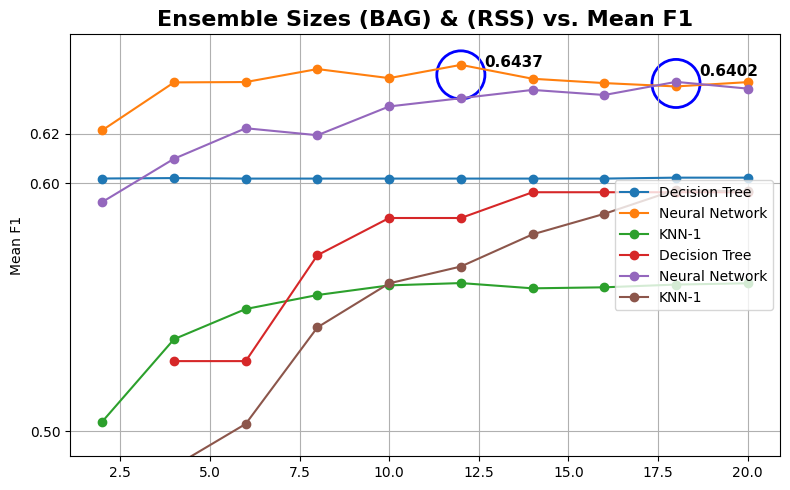

In [71]:
fig, ax = plt.subplots(figsize=(8, 5))

#Plot Ensemble Size vs Mean F1 (Bagging)
ax.plot(dtc_ensemble_sizes, dtc_mean_f1_bag, label='Decision Tree', marker='o')
ax.plot(nn_ensemble_sizes, nn_mean_f1_bag, label='Neural Network', marker='o')
ax.plot(knn_ensemble_sizes, knn_mean_f1_bag, label='KNN-1', marker='o')
highest_samples_bag_score = (12, 0.6436582695010384)   

#Plot Ensemble Size vs Mean F1 (Random SS)
ax.plot(dtc_random_ensemble_sizes, dtc_mean_f1_random, label='Decision Tree', marker='o')
ax.plot(nn_random_ensemble_sizes, nn_mean_f1_random, label='Neural Network', marker='o')
ax.plot(knn_random_ensemble_sizes, knn_mean_f1_random, label='KNN-1', marker='o')
highest_samples_rss_score = (18, 0.6402049982786732)  #NN 


ax.set_ylabel('Mean F1')
ax.set_title('Ensemble Sizes (BAG) & (RSS) vs. Mean F1', fontweight='bold', fontsize=16)
yticks = [0.50, 0.60, 0.62]
ax.set_yticks(yticks)
ax.set_yticklabels([str(tick) for tick in yticks])
ax.set_ylim(bottom=0.49, top=0.66)
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.legend(loc='center right')
ax.grid(True)
plt.scatter(*highest_samples_bag_score, s=1200, facecolors='none', edgecolors='blue', linewidths=2,)
plt.scatter(*highest_samples_rss_score, s=1200, facecolors='none', edgecolors='blue', linewidths=2,)
for point in [highest_samples_bag_score, highest_samples_rss_score]:
    plt.text(point[0] + 0.65, point[1] + 0.005, f'{point[1]:.4f}', fontsize=11, color='black', ha='left', va='center', fontweight='bold')
plt.tight_layout()
plt.show()

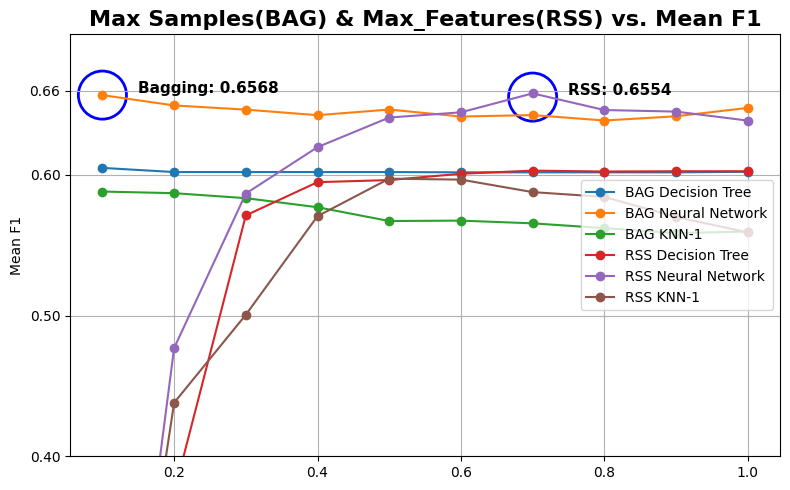

In [95]:
fig, ax = plt.subplots(figsize=(8, 5))

#Plot Max Samples of Bagging Ensemble vs Mean F1 of Classifiers
ax.plot(dtc_max_samples, dtc_mean_f1_samples, label='BAG Decision Tree', marker='o')
ax.plot(nn_max_samples, nn_mean_f1_samples, label='BAG Neural Network', marker='o')
ax.plot(knn_max_samples, knn_mean_f1_samples, label='BAG KNN-1', marker='o')
highest_samples_bag_score = (0.1, 0.6567978753797518)  #NN 


#Plot Max_Features of Random Subspacing with Previous Best Ensemble Size
ax.plot(dtc_max_features, dtc_mean_f1_features, label='RSS Decision Tree', marker='o')
ax.plot(nn_max_features, nn_mean_f1_features, label='RSS Neural Network', marker='o')
ax.plot(knn_max_features, knn_mean_f1_features, label='RSS KNN-1', marker='o')
highest_samples_rss_score = (0.7, 0.6553803595506553)  #NN


ax.set_ylabel('Mean F1')
ax.set_title('Max Samples(BAG) & Max_Features(RSS) vs. Mean F1', fontweight='bold', fontsize=16)
yticks = [0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.66]
ax.set_yticks(yticks)
ax.set_yticklabels([str(tick) for tick in yticks])
ax.set_ylim(bottom=0.4, top=0.70)
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.legend(loc='center right')
ax.grid(True)
plt.scatter(*highest_samples_bag_score, s=1200, facecolors='none', edgecolors='blue', linewidths=2,)
plt.scatter(*highest_samples_rss_score, s=1200, facecolors='none', edgecolors='blue', linewidths=2,)
for point in [highest_samples_bag_score]:
    bag_text = "Bagging: "
    plt.text(point[0] + 0.05, point[1] + 0.005, bag_text + f'{point[1]:.4f}', fontsize=11, color='black', ha='left', va='center', fontweight='bold')
for point in [highest_samples_rss_score]:
    rss_text = "RSS: "  # Replace "YourCustomText" with the desired value
    plt.text(point[0] + 0.05, point[1] + 0.005, rss_text + f'{point[1]:.4f}', fontsize=11, color='black', ha='left', va='center', fontweight='bold')
plt.tight_layout()
plt.show()

#### Analysis Discussion

Which set of Classifiers is expected to benefit more from bagging than random subspacing?

        Decision Tree & Neural Network

Which classifiers benefit more from random subspacing over bagging?

        KNN-1

Determine the Best Ensemble Strategy for each of these classifiers.

        Decison Tree: Ensemble Size of 18 and method of Bagging with max_samples of 0.1. F-1 Score: 0.6050430439925206

        Neural Network: Ensemble Size of 12 and method of Bagging with max_samples of 0.1. F-1 Score: 0.6567978753797518

        KNN-1: Ensemble Size of 18 and method Random Sub-spacing with max_features of 0.5. F-1 Score: 0.5973813715620981

Is this what you expected? Why?

        Due to the nature of Decision Trees and Neural Networks, being classifiers that can be trained very precisely for data, this mean they can easily be overfit. This makes sense why Bagging would be better than Random Subspacing for their ensembles as Baggins specifically helps reduce overfitting. 
        It makes sense that KNN performs better with Random Subspacing as it is more prone to being skewed by noisy data and RSS mitigates this through its random nature. 

Is there diversity in your ensemble and what else could be done to improve performance of the ensemble? 

        There is diversity in each bagging and random subspacing ensemble run above as I iterated throgh 10 different ensemble sizes for each classifier with a default max_sample or max_feature specificied, and then used the best ensemble sizes for each classifier to test through 10 different max_sample or max_feature values.

        Further improvements could be done by changing more specifications in the Bagging/random subspacing ensembles along with more paramaters for the original classifiers in Task b (DTC, NN, KNN-1). 


## Question 2: RL Agents

### (a) Plan RL Agent

### (b) Implement Planned Agent

### (c) Compare RL Strategies

### (d)